#### Importing Libs

In [1]:
from core.PipelineProject import PrepareDataAndTrainingModels
from core.SQLeto import SQLeto
from decouple import config
from sklearn.metrics import (f1_score,
                    roc_auc_score,
                    recall_score,
                    precision_score,
                    roc_curve)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Load enviroment vars

In [2]:
RAW_DATA_PATH = config('RAW_DATA_PATH')
DATABASE_POSTGRES = config('DATABASE_POSTGRES')
USER_POSTGRES = config('USER_POSTGRES')
PWD_POSTGRES = config('PWD_POSTGRES')

#### Load data from POTSGRES

In [3]:
# Create object to access database
sqleto = SQLeto(
    database=DATABASE_POSTGRES, 
    user=USER_POSTGRES,
    password=PWD_POSTGRES)
    
# Getting data in a dataframe
data = sqleto.execute_DQL(
    '''
        SELECT * FROM creditcard
    '''
)

#### Load models

In [4]:
# Models to test
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#### Load scaler

In [5]:
# Scaler
from sklearn.preprocessing import RobustScaler

#### Load balancer

In [6]:
# Balancer
from imblearn.over_sampling import SMOTE

#### Use Pipeline to avaliate Models

In [7]:
prep = PrepareDataAndTrainingModels(
    dataframe=data,
    target="Class",
    scaler=RobustScaler(),
    models=[
        MLPClassifier(),
        DecisionTreeClassifier(),
        XGBClassifier()],
    balancer = SMOTE(),
    score_metric = (f1_score,
                    roc_auc_score,
                    recall_score,
                    precision_score)
)
prep.splitting_data()


In [8]:
prep.fit_models()

In [9]:
prep.compute_scores()

,model,f1_score,roc_auc_score,recall_score,precision_score
0,MLPClassifier(),0.274725,0.591789,0.183824,0.543478
1,DecisionTreeClassifier(),0.770833,0.907848,0.816176,0.730263
2,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.890625,0.919082,0.838235,0.950000


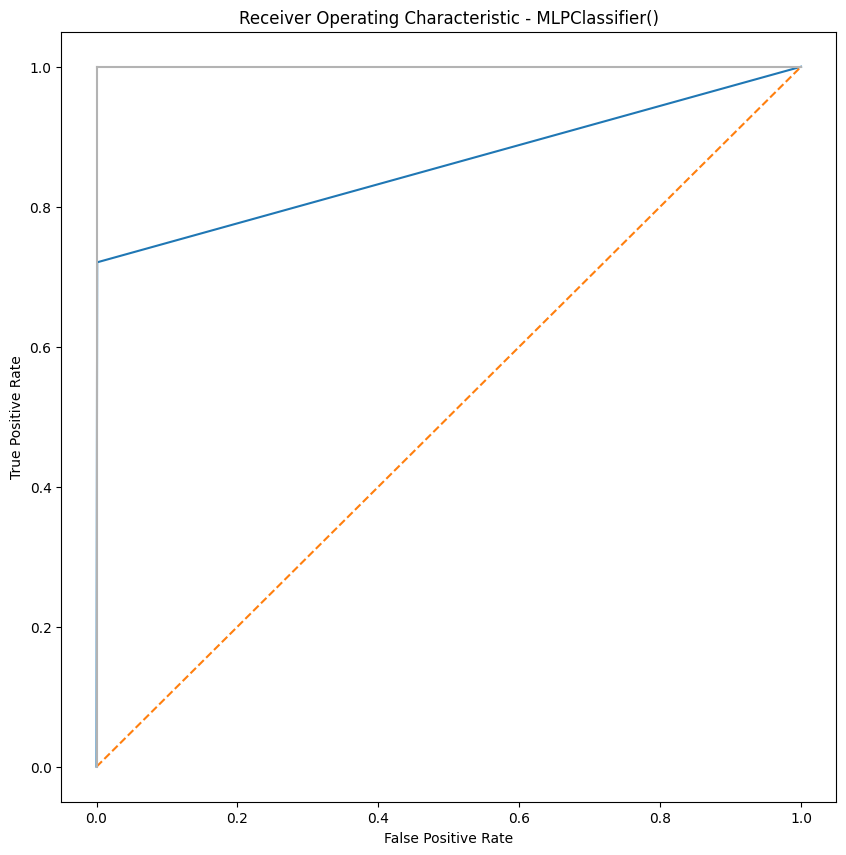

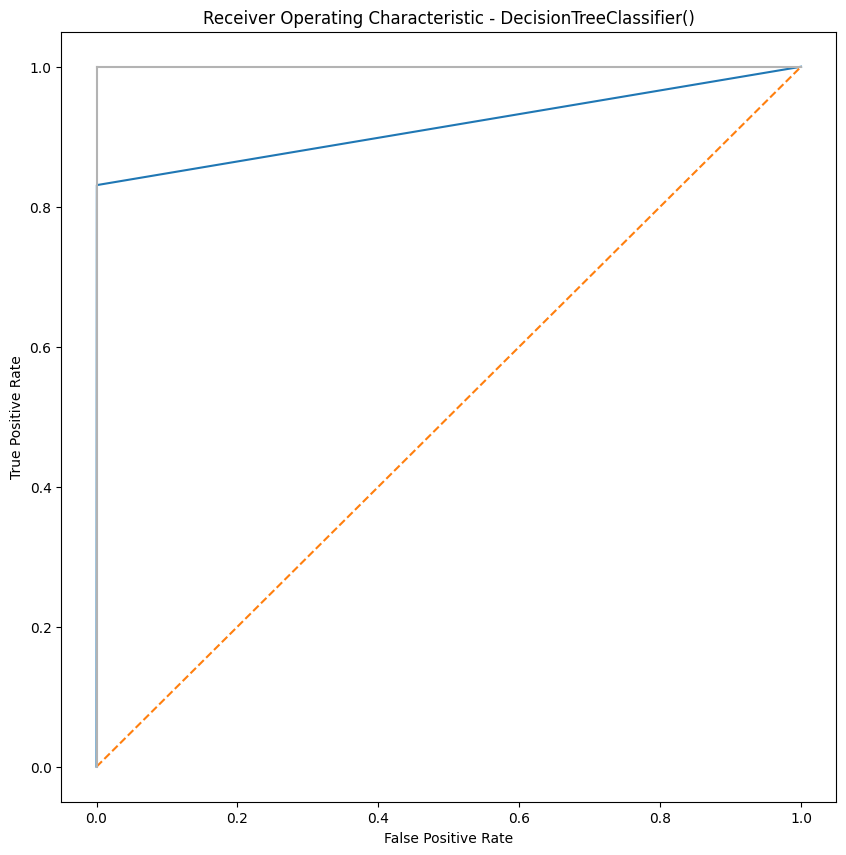

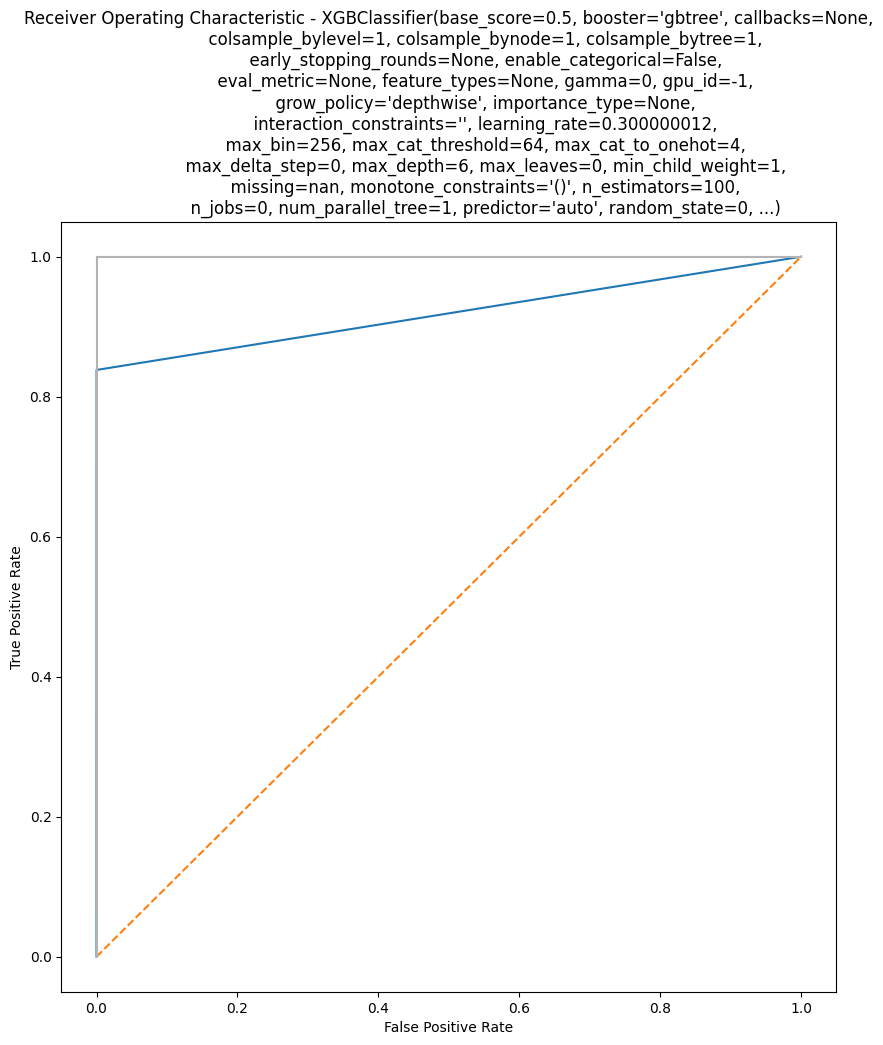

In [10]:
prep.plot_roc_curves()